<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/VU_logo.png/800px-VU_logo.png?20161029201021" width="350">

### Programming large-scale parallel systems


# Julia basics

## Contents

In this notebook, we will cover the basic parts of Julia needed later to learn parallel computing. In particular, we will learn about:

- Variables
- Functions
- Arrays

For a more general introduction to Julia see the nice tutorials made available by JuliaAcademy [here](https://github.com/JuliaAcademy/JuliaTutorials/) or the official Julia educational resources [here](https://julialang.org/learning/).



## Using Jupyter notebooks in Julia

We are going to use Jupyter notebooks in this and other lectures. You provably have worked with notebooks (in Python). If not, here are the basic concepts you need to know to follow the lessons.

<div class="alert alert-block alert-info">
<b>Tip:</b> Did you know that Jupyter stands for Julia, Python and R?
</div>

### How to start a Jupyter notebook in Julia

To run a Julia Jupyter notebook, open a Julia REPL and type

```julia
julia> ]
pkg> add IJulia
julia> using IJulia
julia> notebook()
```
A new browser window will open. Navigate to the corresponding notebook and open it.

<div class="alert alert-block alert-warning">
<b>Warning:</b> Make sure that the notebook is using the same Julia version as the one you used to launch `IJulia`. If it is not the same, go to Kernel > Change Kernel and choose the right version (see figure below).
</div>





<div>
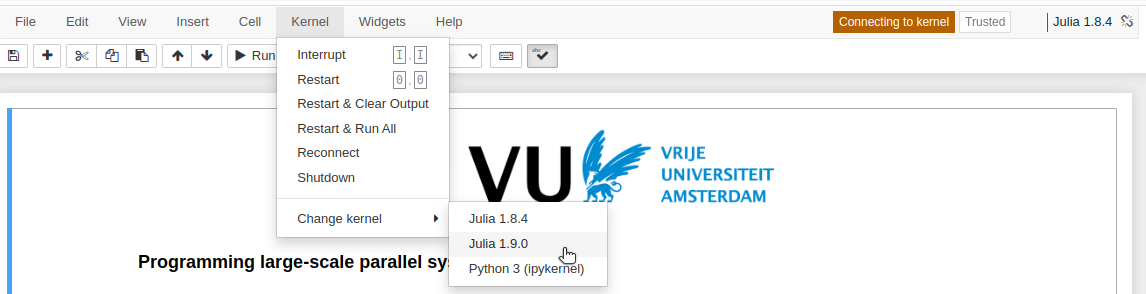
</div>

### Running a cell
To run a cell, click on a cell and press `Shift` + `Enter`. You can also use the "Run" button in the toolbar above.

In [1]:
1+3
4*5

20

As you can see from the output of previous cell, the value of the last line is displayed. We can suppress the output with a semicolon. Try it. Execute next cell.

In [2]:
1+3
4*5;

### Cell order is important

Running the two cells below in reverse order won't work (try it). 

In [3]:
foo() = "Well done!"

foo (generic function with 1 method)

In [4]:
foo()

"Well done!"

### A very easy first exercise

Run the following cell. It contains definitions used later in the notebook.

In [5]:
function why_q1()
    msg = """
    In the first line, we assign a variable to a value. In the second line, we assign another variable to the same value. Thus, we have 2 variables associated with the same value. In line 3, we associate y to a new value (re-assignment). Thus, we have 2 variables associated with 2 different values. Variable x is still associated with its original value. Thus, the value at the final line is x=1.
    """
    println(msg)
end
function why_q2()
    msg = """
    It will be 1 for very similar reasons as in the previous questions: we are reassigning a local variable, not the global variable defined outside the function.
    """
    println(msg)
end
function why_q3()
    msg = """
    It will be 6. In the returned function f2, x is equal to 2. Thus, when calling f2(3) we compute 2*3.
    """
    println(msg)
end
println("🥳 Well done! ")

🥳 Well done! 


### REPL modes

This is particular to Julia notebooks. You can use package, help, and shell mode just like in the Julia REPL.

In [6]:
] add MPI

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [7]:
? print

search: print println printstyled sprint isprint prevind parentindices precision



```
print([io::IO], xs...)
```

Write to `io` (or to the default output stream [`stdout`](@ref) if `io` is not given) a canonical (un-decorated) text representation. The representation used by `print` includes minimal formatting and tries to avoid Julia-specific details.

`print` falls back to calling `show`, so most types should just define `show`. Define `print` if your type has a separate "plain" representation. For example, `show` displays strings with quotes, and `print` displays strings without quotes.

See also [`println`](@ref), [`string`](@ref), [`printstyled`](@ref).

# Examples

```jldoctest
julia> print("Hello World!")
Hello World!
julia> io = IOBuffer();

julia> print(io, "Hello", ' ', :World!)

julia> String(take!(io))
"Hello World!"
```


In [8]:
; ls

README.md
config.sh
jacobi_method.ipynb
julia_async.ipynb
julia_basics.ipynb
julia_distributed.ipynb
julia_mpi.ipynb
literature
matrix_matrix.ipynb


## Variables

The usage of variables in Julia is pretty similar to Python and quite different from C/C++ and Fortran. However, there are also some differences with Python. 

### Creating a variable

A variable is a name associated (bound) to a value. We associate variables with values with `=` as usual.

In [9]:
a = 1

1

When assigning a variable, the value on the right hand side is not copied into the variable. It is just an association of a name with a value (much like in Python).

### Re-assign a variable

We can re-assign a variable, even with a value of another type. However, avoid changing the variable type for performance reasons.

In [10]:
a = 2

2

In [11]:
a = 1.0

1.0

In [12]:
a = "Hi!"

"Hi!"

### Unreachable objects

When an object is not associated with a variable any more,  it cannot be reached by the user. This can happen, e.g., when we re-assign a variable. Another case is when local variables, e.g in a function, go out of scope. The following line allocates a large array and assigns it to variable a

In [13]:
 a = zeros(300000000);

If we re-assign the variable to another value, the large array will be inaccessible.

In [14]:
a = nothing

### Garbage collector

Luckily, Julia has a garbage collector that deallocates unreachable objects. You don't need to bother about manual deallocation! Julia is not constantly looking for unreachable objects. Thus, garbage collection does not happen instantaneously, but it will happen at some point. You can also explicitly call the garbage collector, but it is almost never done in practice.

In [15]:
GC.gc()

### Type declarations are optional

Julia knows the type of the object associated with a variable.

In [16]:
a = 1
typeof(a)

Int64

We can annotate types if we want, but this will not improve performance (except in very special situations). Thus, annotating types is not done in practice.

In [17]:
c::Int = 1
typeof(c)

Int64

If you annotate a variable with a type, then it cannot refer to objects of other types.

In [18]:
c = "I am a string"

LoadError: MethodError: [0mCannot `convert` an object of type [92mString[39m[0m to an object of type [91mInt64[39m

[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::T[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:6[24m[39m
[0m  convert(::Type{T}, [91m::T[39m) where T
[0m[90m   @[39m [90mBase[39m [90m[4mBase.jl:84[24m[39m
[0m  convert(::Type{T}, [91m::Number[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:7[24m[39m
[0m  ...


### Variable names

There is a great flexibility to choose variable names in Julia. See all the rules in the [manual](https://docs.julialang.org/en/v1/manual/variables/#man-allowed-variable-names) if you are interested.

We can use Unicode (UTF-8 encoding) characters in variables and function names.

In [19]:
🐱 = "I am a cat"
🐶 = "I am a dog"
🐱 == 🐶

false

We can also use Greek letters and other mathematical symbols. Just write the corresponding [LaTeX](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols) command and press `Tab`. For example: `ω` is written `\omega` + `Tab`

In [20]:
ω = 1.234
sin(ω)

0.9438182093746337

In fact, some useful mathematical constants are predefined in Julia with math Greek letters.

In [21]:
sin(π/2)

1.0


<div class="alert alert-block alert-success">
<b>Question (NB1-Q1):</b>  What will be the value of `x` in the last line ? (Think your answer before executing next cell to find out the result)    
</div>



In [22]:
x = 1
y = x
y = 2
x

1

Run next cell to get an explanation of this question.

In [23]:
why_q1()

In the first line, we assign a variable to a value. In the second line, we assign another variable to the same value. Thus, we have 2 variables associated with the same value. In line 3, we associate y to a new value (re-assignment). Thus, we have 2 variables associated with 2 different values. Variable x is still associated with its original value. Thus, the value at the final line is x=1.



## Functions

Julia is very much a functional programming language. In consequence, Julia is more centered on functions than on types. This is in contrast to object-oriented languages, which are more centered on types (classes). For instance, you don't need to know the details of the Julia type system to learn parallel programming in Julia, but you need to have a quite advanced knowledge of how Julia functions work.

### Defining functions

Functions are defined as shown in next cell. The closing `end` is necessary. Do not forget it! However, the `return` is optional. The value of last line is returned by default. Indentation is recommended, but it is also optional. That's why the closing `end` is needed.

In [24]:
function add(a,b)
    return a + b  
end

add (generic function with 1 method)

Once defined, a function can be called using bracket notation as you would expect.

In [25]:
add(1,3)

4

### Broadcast syntax

We can apply functions to arrays element by element using broadcast (dot) syntax.

In [26]:
a = [1,2,3]
b = [4,5,6]
add.(a,b)

3-element Vector{Int64}:
 5
 7
 9

Mathematical operators can also be broadcasted (like in Matlab). Multiplying the vectors `a * b` directly won't work. If we want to multiply element by element, we can use the broadcasted version below.

In [27]:
a .* b

3-element Vector{Int64}:
  4
 10
 18

<div class="alert alert-block alert-success">
<b>Question (NB1-Q2):</b>  What will be the value of `x` in the last line ?
</div>


In [28]:
function q(x)
    x = 2
    x
end

q (generic function with 1 method)

In [29]:
x = 1
y = q(x)
x

1

Run next cell to get an explanation of this question.

In [30]:
why_q2()

It will be 1 for very similar reasons as in the previous questions: we are reassigning a local variable, not the global variable defined outside the function.



### References

As you can see variables are passed "by value". Passing variables "by reference" is done using a reference.


In [31]:
function q!(x)
    x[] = 2
    x
end

q! (generic function with 1 method)

In [32]:
x = Ref(1)
q!(x)
x[]

2

### Defining functions (shorter way)

For short functions, we can skip the `function` and `end` keywords as follows.


In [33]:
add_short(a,b) = a+b

add_short (generic function with 1 method)

In [34]:
add_short(1,3)

4

### Anonymous (lambda) functions

Since we can assign function to variables, it is not needed for a function to have a function name in many cases. We can simply create an anonymous function (i.e., a function without name) and assign it to a variable.

In [35]:
add_anonymous = (a,b) -> a+b

#1 (generic function with 1 method)

We can call the function by using the variable name.

In [36]:
add_anonymous(2.0,3.5)

5.5

Note that `add_anonymous` is not a function name. It is just a variable associated with a function with no function name (well, it has a name technically, but with an arbitrary value).

In [37]:
nameof(add_anonymous)

Symbol("#1")

In [38]:
nameof(add)

:add

### Functions are first-class objects

We can work with Julia functions like with any other type of object. For instance, we can assign functions to variables.

In [39]:
a = add

add (generic function with 1 method)

Now, we can call the function using the variable name.

In [40]:
a(4,5)

9

We can also create an array of functions (this will not work in Python).

In [41]:
funs = [+,-,*]

3-element Vector{Function}:
 + (generic function with 189 methods)
 - (generic function with 193 methods)
 * (generic function with 233 methods)

To call a specific function in the array, we index the array and then call the returned function

In [42]:
funs[2](2,3)

-1

In [43]:
funs[1](5,5)

10

### Higher-order functions

Higher order functions are functions that take and/or return other functions. And example is the `count` function in Julia.

For instance, we can pass a user-defined function to count the number of even elements in an array.

In [44]:
func = i->i%2==0
a = [1,2,3,5,32,2,4]
count(func,a)

4

### Do-blocks

There is yet another way to define anonymous functions. If a function takes a function in its first argument (like `count`) we can skip the first argument, when calling the function, and define the function we want to pass in a do-block. This is useful, e.g., if we want to define a multi-line anonymous function. The two next cells are equivalent.

In [45]:
function f(i)
    m = i%2
    m != 0
end
count(f,[1,2,3,5,32,2,4])

3

Looks like a for loop in Python

In [46]:
count([1,2,3,5,32,2,4]) do i
    m = i%2
    m != 0
end

3

### Returning multiple values

Julia functions always return a single variable. To return multiple values, we can wrap them in a tuple.


In [47]:
function divrem(a,b)
    α = div(a,b)
    β = rem(a,b)
    (α,β)
end

divrem (generic function with 1 method)

The output is a tuple as expected, but we can recover the individual values by unpacking the tuple.

In [48]:
d,r = divrem(10,3)

(3, 1)

In [49]:
d

3

In [50]:
r

1

### Variable number of input arguments

Functions with multiple arguments are also supported. The following example iterates over the given arguments and prints them. `args` is just a tuple with all arguments.

In [51]:
function showargs(args...)
    for (i,arg) in enumerate(args)
        println("args[$i] = $arg")
    end
end

showargs (generic function with 1 method)

In [52]:
showargs(1,"Hi!",π)

args[1] = 1
args[2] = Hi!
args[3] = π


In [53]:
showargs(6)

args[1] = 6


In [54]:
for i in 1:5
    showargs(i)
end

args[1] = 1
args[1] = 2
args[1] = 3
args[1] = 4
args[1] = 5


### Positional and keyword arguments

Functions can combine positional and keyword arguments much like in Python, but keyword arguments start with semicolon `;` in Julia.

In [55]:
function foo(a,b;c,d)
    println("Positional: a=$a, b=$b. Keyword: c=$c, d=$d")
end

foo (generic function with 2 methods)

In [56]:
foo(3,4,d=2,c=1)

Positional: a=3, b=4. Keyword: c=1, d=2


### Optional arguments

We can provide default values to arguments to make them optional.

In [57]:
function bar(a,b=0;c,d=1)
    println("Positional: a=$a, b=$b. Keyword: c=$c, d=$d")
end

bar (generic function with 2 methods)

In [58]:
bar(1,c=2)

Positional: a=1, b=0. Keyword: c=2, d=1


<div class="alert alert-block alert-success">
<b>Question (NB1-Q3):</b>  Which will be the value of `x` below?  
</div>



In [59]:
function hofun(x)
    y -> x*y
end

hofun (generic function with 1 method)

In [60]:
f2 = hofun(2)

#9 (generic function with 1 method)

In [61]:
x = f2(3)
x

6

Run next cell to get an explanation of this question.

In [62]:
why_q3()

It will be 6. In the returned function f2, x is equal to 2. Thus, when calling f2(3) we compute 2*3.



## Arrays

Julia supports multi-dimensional arrays. They are very similar to Numpy arrays in Python. Let's learn the basics of Julia arrays.


### Array literals

We can create (small) arrays from the given values using array literals.

Next cell creates a vector with 3 integers. Note for Python users: there is no difference between vectors and lists in Julia.

In [63]:
vec = [1,2,3]

3-element Vector{Int64}:
 1
 2
 3

We can create a matrix as follows.

In [64]:
mat = [1 2 3 4
       5 6 7 8
       9 10 11 12]

3×4 Matrix{Int64}:
 1   2   3   4
 5   6   7   8
 9  10  11  12

### Array initialization

We can create arrays with all the entries equal to zero, to one, or to a specific given value. The value can be any Julia object, even a function!


In [65]:
zeros(4)

4-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0

In [66]:
zeros(Int,4)

4-element Vector{Int64}:
 0
 0
 0
 0

In [67]:
ones(2,3)

2×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0

In [68]:
? ones()

```
ones([T=Float64,] dims::Tuple)
ones([T=Float64,] dims...)
```

Create an `Array`, with element type `T`, of all ones with size specified by `dims`. See also [`fill`](@ref), [`zeros`](@ref).

# Examples

```jldoctest
julia> ones(1,2)
1×2 Matrix{Float64}:
 1.0  1.0

julia> ones(ComplexF64, 2, 3)
2×3 Matrix{ComplexF64}:
 1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im
```


In [69]:
fill(5.0,3,4)

3×4 Matrix{Float64}:
 5.0  5.0  5.0  5.0
 5.0  5.0  5.0  5.0
 5.0  5.0  5.0  5.0

In [70]:
fill(add,3,4)

3×4 Matrix{typeof(add)}:
 add  add  add  add
 add  add  add  add
 add  add  add  add

### Array comprehensions

We can also create the items in the array using a loop within an array comprehension.

In [71]:
squares = [ i^2 for i in 1:8 ]

8-element Vector{Int64}:
  1
  4
  9
 16
 25
 36
 49
 64

### Indexing

We can get and set the items of an array by indexing the array.

In [72]:
squares[3]

9

In [73]:
squares[end]

64

In [74]:
squares[2:4]

3-element Vector{Int64}:
  4
  9
 16

In [75]:
squares[4] = 16

16

In [76]:
squares[2:3] = [4,9]

2-element Vector{Int64}:
 4
 9

### Immutable element type

Note that once set, the type of the elements in the array cannot be changed. If we try to set an item with an object of a different type, Julia will try to do a conversion, which can fail depending on the passed value.

In [77]:
a = [10,11,12,13]

4-element Vector{Int64}:
 10
 11
 12
 13

In [78]:
a[2] = "Hi!"

LoadError: MethodError: [0mCannot `convert` an object of type [92mString[39m[0m to an object of type [91mInt64[39m

[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::T[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:6[24m[39m
[0m  convert(::Type{T}, [91m::T[39m) where T
[0m[90m   @[39m [90mBase[39m [90m[4mBase.jl:84[24m[39m
[0m  convert(::Type{T}, [91m::Number[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:7[24m[39m
[0m  ...


### Arrays of any element type

Arrays of fixed element type seem to be very rigid, right? Python list do not this limitation. However, we can use arrays of the `Any` type, which are as flexible as Python lists, or even more since they can also contain functions. 

In [79]:
a = Any[10,11,12,13]

4-element Vector{Any}:
 10
 11
 12
 13

In [80]:
a[3] = "HI!"

"HI!"

In [81]:
a

4-element Vector{Any}:
 10
 11
   "HI!"
 13

### Loops

The loop in next cell visits the elements in `a` one after the other. 

In [82]:
a = [10,20,30,40]
for ai in a
    @show ai
end

ai = 10
ai = 20
ai = 30
ai = 40


This loop visits the integers from 1 to the length of the array and indexes the array at each of these integers.

In [83]:
for i in 1:length(a)
    ai = a[i]
    @show (i,ai)
end

(i, ai) = (1, 10)
(i, ai) = (2, 20)
(i, ai) = (3, 30)
(i, ai) = (4, 40)


This loop "enumerates" the items in the array.

In [84]:
for (i,ai) in enumerate(a)
    @show (i,ai)
end

(i, ai) = (1, 10)
(i, ai) = (2, 20)
(i, ai) = (3, 30)
(i, ai) = (4, 40)


### Arrays indices are 1-based by default

Be aware of this if you are a C or Python user.

In [85]:
a = [10,20,30,40]
a[0]

# Array starts not at zero!

LoadError: BoundsError: attempt to access 4-element Vector{Int64} at index [0]

### Slicing allocates a new array

This is also different from Numpy in Python.

In [86]:
a = [1 2 3
     4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [87]:
s = a[:,2]

2-element Vector{Int64}:
 2
 5

In [88]:
s[2] = 0

0

In [89]:
a

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

### Array views

If you want to modify the original array, use `view` instead.

In [90]:
v = view(a,:,2)

2-element view(::Matrix{Int64}, :, 2) with eltype Int64:
 2
 5

In [91]:
v[1] = 0

0

In [92]:
a

2×3 Matrix{Int64}:
 1  0  3
 4  5  6

## Exercises

### Exercise 1

Implement a function `ex1(a)` that finds the largest item in the array `a`. It should return the largest item and its corresponding position in the array. If there are multiple maximal elements, then the first one will be returned. Assume that the array is not empty. Implement the function in the next cell. Test your implementation with the other one.

In [93]:
function ex1(array)
    x = 0
    loop = 0
    for item in array
        if x < item
            loop += 1
            x = item
        end
    end
    (x, loop)
end

ex1 (generic function with 1 method)

In [94]:
function ex1(array)
    value, index = findmax(array)
    (value, index)
end

ex1 (generic function with 1 method)

In [95]:
ex1_short = array -> findmax(array)

#13 (generic function with 1 method)

In [96]:
ex1([3,4,7,3,1,7,2]) == ex1_short([3,4,7,3,1,7,2])

true

In [97]:
using Test
arr = [3,4,7,3,1,7,2]
@test ex1(arr) == (7,3)

Test Passed

### Exercise 2

Implement a function `ex2(f,g)` that takes two functions `f(x)` and `g(x)` and returns a new function `h(x)` representing the sum of `f` and `g`, i.e., `h(x)=f(x)+g(x)`.

In [98]:
ex2(f,g) = x -> f(x) + g(x)

ex2 (generic function with 1 method)

In [99]:
h = ex2(sin,cos)
xs = LinRange(0,2π,100)
@test all(x-> h(x) == sin(x)+cos(x), xs)

Test Passed

### Exercise 3 (hard)

Function `mandel` estimates if a given point `(x,y)` in the complex plane belongs to the [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set).

In [1]:
function mandel(x,y,max_iters)
    z = Complex(x,y)
    c = z
    threshold=2
    for n in 1:max_iters
        if abs(z)>threshold
            return n-1
        end
        z = z^2 +c
    end
    max_iters
end

mandel (generic function with 1 method)

If the value of `mandel` is less than `max_iters`, the point is provably outside the Mandelbrot set. If `mandel` is equal to  `max_iters`, then the point is provably inside the set. The larger `max_iters`, the better the quality of the estimate (the nicer will be your plot).

Plot the value of function `mandel` for each pixel in a 2D grid of the box.

$$(-1.7,0.7)\times(-1.2,1.2).$$

Use a grid resolution of at least 1000 points in each direction and `max_iters` at least 10. You can increase these values to get nicer plots. To plot the values use function `heatmap` from the Julia package `GLMakie`. Use `LinRange` to divide the horizontal and vertical axes into pixels. See the documentation of these functions for help. `GLMakie` is a GPU-accelerated plotting back-end for Julia. It is a large package and it can take some time to install and to generate the first plot. Be patient.

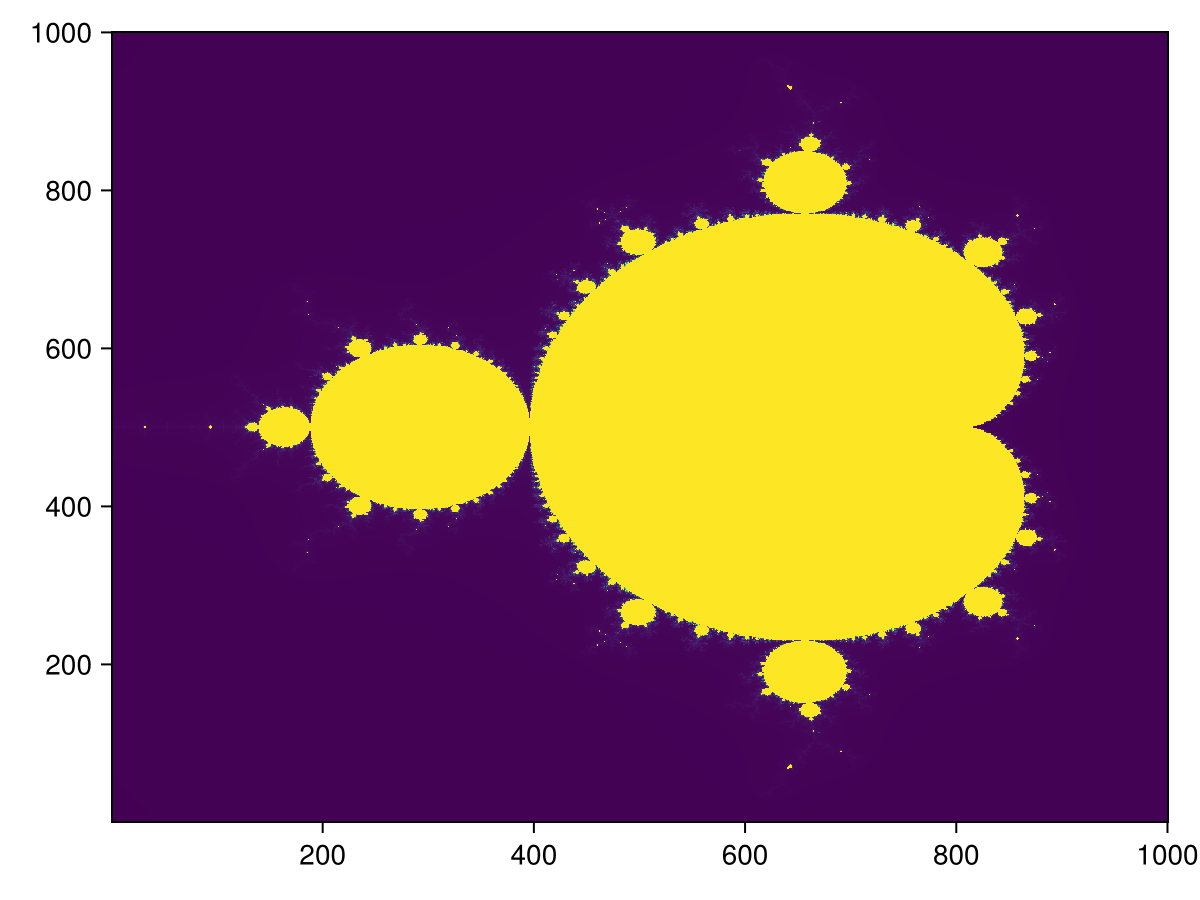

In [3]:
using CairoMakie

dimension = 1000
matrix = Matrix{Float64}(undef, dimension, dimension)
max_iter = 1000
pixels = hcat(LinRange(-1.7,0.7, dimension), LinRange(-1.2,1.2, dimension));

for i in 1:dimension
    for j in 1:dimension
        matrix[i, j] = mandel(pixels[i, 1], pixels[j, 2], max_iter)
    end
end

heatmap(matrix)

# License

This notebook is part of the course [Programming Large Scale Parallel Systems](https://www.francescverdugo.com/XM_40017/) at Vrije Universiteit Amsterdam and may be used under a [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/) license.